In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [41]:
df_shanghai = pd.read_csv('sh_ershou_clean.csv', index_col = 0)
df_hangzhou = pd.read_csv('hz_ershou_clean.csv', index_col = 0)

In [42]:
print('df_shanghai.shape:{}'.format(df_shanghai.shape))
print('df_hangzhou.shape:{}'.format(df_hangzhou.shape))

df_shanghai.shape:(14780, 7)
df_hangzhou.shape:(35942, 7)


In [43]:
df_shanghai['year'] = df_shanghai['info'].str.extract('([\d]+)年').astype('float')
# df_hangzhou['year'] = df_hangzhou['info'].str.extract('([\d]+)年').astype('float')
# 杭州数据没有建房年份

In [44]:
df_shanghai.describe()

,total_price,unit_price,area,year
count,14780.000000,14780.000000,14780.000000,13498.000000
mean,514.321616,60010.600474,85.362117,1999.543932
std,520.297698,28833.133598,58.490598,11.070863
min,36.000000,9743.000000,8.680000,1911.000000
25%,253.000000,38246.500000,51.907500,1994.000000
50%,385.000000,58976.500000,72.880000,1999.000000
75%,600.000000,77363.750000,101.985000,2008.000000
max,17800.000000,451777.000000,1547.730000,2020.000000


In [45]:
df_hangzhou.describe()

,total_price,unit_price,area
count,35942.000000,35942.000000,35942.000000
mean,399.349858,39625.255050,101.016017
std,327.967287,20116.935677,50.150677
min,18.000000,4016.000000,7.160000
25%,215.000000,25115.250000,67.290000
50%,310.000000,35827.000000,89.150000
75%,478.000000,48535.750000,126.337500
max,8500.000000,130000.000000,816.000000


上海总价

上海二手房总价0.9分位数:960.0


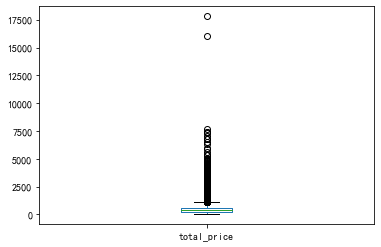

In [20]:
# 上海二手房总价大部分在1000W以内
df_shanghai.total_price.plot(kind = 'box')
quantile = 0.9
print('上海二手房总价{}分位数:{}'.format(quantile, df_shanghai.total_price.quantile(quantile)))

<AxesSubplot:ylabel='Frequency'>

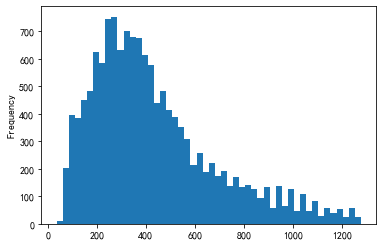

In [74]:
# 大部分二手房500W以内？
df_shanghai.loc[df_shanghai.total_price<df_shanghai.total_price.quantile(0.95), 'total_price'].plot(kind = 'hist', bins = 50)

上海单价

上海二手房单价0.9分位数:96211.7元/平方米


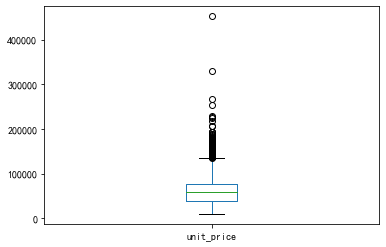

In [54]:
# 上海二手房单价大部分在10W以内
df_shanghai.unit_price.plot(kind = 'box')
quantile = 0.9
print('上海二手房单价{}分位数:{}元/平方米'.format(quantile, df_shanghai.unit_price.quantile(quantile)))

<AxesSubplot:ylabel='Frequency'>

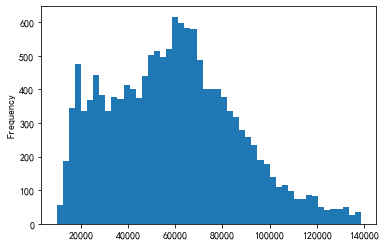

In [75]:
# 上海二手房单价大部分在2-8w
df_shanghai.loc[df_shanghai.unit_price<df_shanghai.unit_price.quantile(0.99), 'unit_price'].plot(kind = 'hist', bins = 50)

杭州总价

杭州二手房总价0.95分位数:950.0


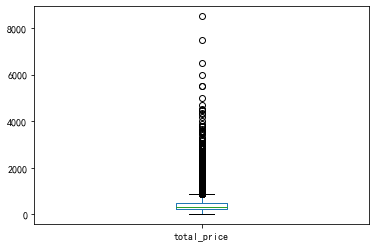

In [69]:
# 杭州二手房总价大部分在1000W以内
df_hangzhou.total_price.plot(kind = 'box')
quantile = 0.95
print('杭州二手房总价{}分位数:{}'.format(quantile, df_hangzhou.total_price.quantile(quantile)))

<AxesSubplot:ylabel='Frequency'>

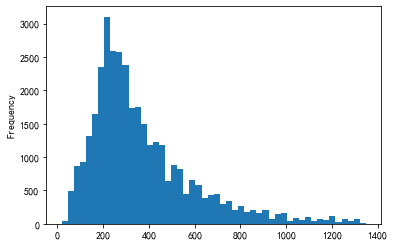

In [76]:
# 大部分二手房400W以内？
# df_hangzhou.total_price.plot(kind = 'hist')
df_hangzhou.loc[df_hangzhou.total_price<df_hangzhou.total_price.quantile(0.98), 'total_price'].plot(kind = 'hist', bins = 50)

杭州单价

杭州二手房单价0.98分位数:95209.24元/平方米


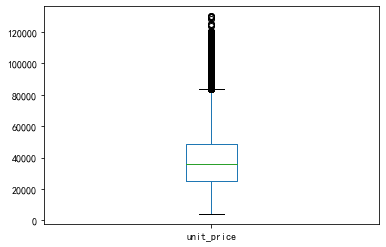

In [79]:
# 杭州二手房单价大部分在10W以内
df_hangzhou.unit_price.plot(kind = 'box')
quantile = 0.98
print('杭州二手房单价{}分位数:{}元/平方米'.format(quantile, df_hangzhou.unit_price.quantile(quantile)))

<AxesSubplot:ylabel='Frequency'>

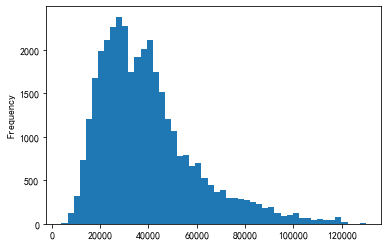

In [81]:
# 上海二手房单价大部分在2-5w
df_hangzhou.loc[df_hangzhou.unit_price<df_hangzhou.unit_price.quantile(1), 'unit_price'].plot(kind = 'hist', bins = 50)

图像汇总

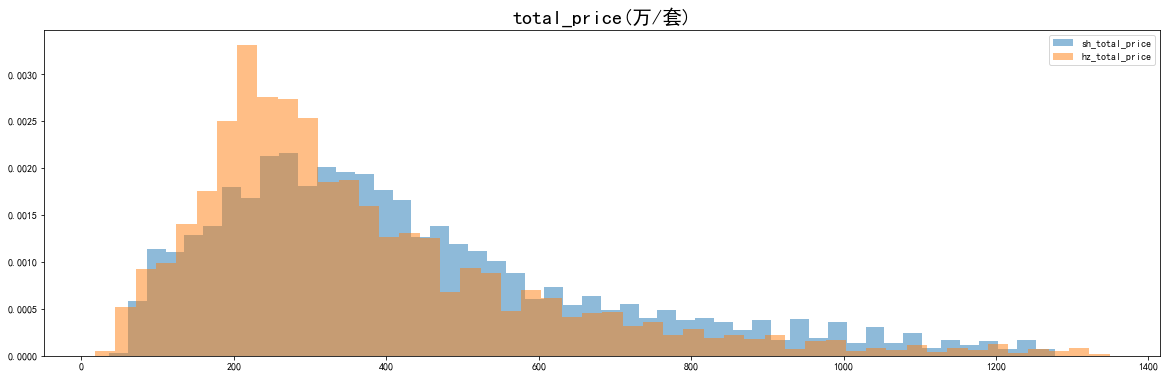

In [84]:
# 总价直方图
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(111)
ax1.hist(df_shanghai.loc[df_shanghai.total_price<df_shanghai.total_price.quantile(0.95), 'total_price'], bins = 50, label = 'sh_total_price', alpha = 0.5, density = True)
ax1.hist(df_hangzhou.loc[df_hangzhou.total_price<df_hangzhou.total_price.quantile(0.98), 'total_price'], bins = 50, label = 'hz_total_price', alpha = 0.5, density = True)
ax1.legend()
ax1.set_title('total_price(万/套)', fontsize = 20)
plt.show()

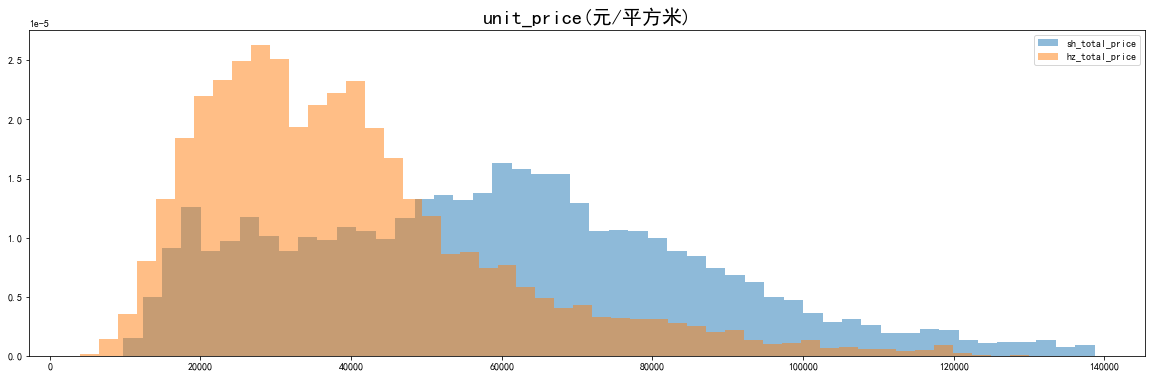

In [86]:
# 总价直方图
fig = plt.figure(figsize = (20,6))
ax1 = fig.add_subplot(111)
ax1.hist(df_shanghai.loc[df_shanghai.unit_price<df_shanghai.unit_price.quantile(0.99), 'unit_price'], bins = 50, label = 'sh_total_price', alpha = 0.5, density = True)
ax1.hist(df_hangzhou.loc[df_hangzhou.unit_price<df_hangzhou.unit_price.quantile(1), 'unit_price'], bins = 50, label = 'hz_total_price', alpha = 0.5, density = True)
ax1.legend()
ax1.set_title('unit_price(元/平方米)', fontsize = 20)
plt.show()

一些相关性

In [98]:
df_shanghai.corr()

,total_price,unit_price,area,year
total_price,1.000000,0.553328,0.719851,0.079527
unit_price,0.553328,1.000000,0.012232,-0.361660
area,0.719851,0.012232,1.000000,0.308382
year,0.079527,-0.361660,0.308382,1.000000


<AxesSubplot:>

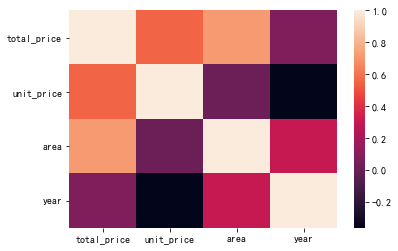

In [99]:
sns.heatmap(df_shanghai.corr())